<a href="https://colab.research.google.com/github/marciodbotas/MachineLearning/blob/main/2_3_9_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create a CNN to classify Cifar-10

Learn about Cifar-10 here: https://www.cs.toronto.edu/~kriz/cifar.html

In class you saw how to build a Convolutional Neural Network that classified Fashion MNIST. Take what you learned to build a CNN that recognizes the 10 classes of CIFAR. It will be a similar network, but there are some key differences you'll need to take into account.

First, while MNIST were 28x28 monochome images (1 color channel), CIFAR are 32x32 color images (3 color channels).

Second, MNIST images are simple, containing just the object, centered in the image, with no background. CIFAR ones can have the object with a background -- for example airplanes might have a cloudy sky behind them! As such you should expect your accuracy to be a bit lower.

We start by setting up the problem for you.

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

We then definte some of the model for you but leave most of it for you to fill in!

*A hint: your model may want to learn some high level features and then classify them.*

In [ ]:
FIRST_LAYER = layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))
HIDDEN_LAYER_TYPE_1 = layers.MaxPooling2D((2, 2))
HIDDEN_LAYER_TYPE_2 = layers.Conv2D(64, (3, 3), activation='relu')
HIDDEN_LAYER_TYPE_3 = layers.MaxPooling2D((2, 2))
HIDDEN_LAYER_TYPE_4 = layers.Conv2D(64, (3, 3), activation='relu')
HIDDEN_LAYER_TYPE_5 = layers.Dense(64, activation='relu')
LAST_LAYER = layers.Dense(10)

model = models.Sequential([
       FIRST_LAYER,
       HIDDEN_LAYER_TYPE_1,
       HIDDEN_LAYER_TYPE_2,
       HIDDEN_LAYER_TYPE_3,
       HIDDEN_LAYER_TYPE_4,
       layers.Flatten(),
       HIDDEN_LAYER_TYPE_5,
       LAST_LAYER,
])

You then need to define loss function. And you can then train your model. Once training is done you'll see a plot of training and validation accuracy. You'll know you have a reasonable model with a reasonable loss funciton if your final training accuracy ends up in the 70s (or possibly higher).

*A hint: your model may want to learn different categories.*

In [ ]:
LOSS = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
NUM_EPOCHS = 20 #You can change this value if you like to experiment with it to get better accuracy

# Compile the model
model.compile(optimizer='sgd',
              loss=LOSS,
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_images, train_labels, epochs=NUM_EPOCHS,
                    validation_data=(test_images, test_labels))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()

Finally, pick a better optimizer. And re-train your model. You'll know you have a reasonable model with a reasonable loss funciton and optimizer if your final training accuracy ends up in the 80s (or possibly higher).

*A hint: your model may want to learn adaptively.*

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3532 - loss: 1.7555 - val_accuracy: 0.5158 - val_loss: 1.3532
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5560 - loss: 1.2477 - val_accuracy: 0.6104 - val_loss: 1.1027
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6249 - loss: 1.0621 - val_accuracy: 0.6216 - val_loss: 1.0893
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6698 - loss: 0.9453 - val_accuracy: 0.6528 - val_loss: 0.9944
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6901 - loss: 0.8797 - val_accuracy: 0.6781 - val_loss: 0.9241
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7185 - loss: 0.8033 - val_accuracy: 0.6894 - val_loss: 0.9253
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7358 - loss: 0.7558 - val_accuracy: 0.6895 - val_loss: 0.8969
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7493 - loss: 0.71

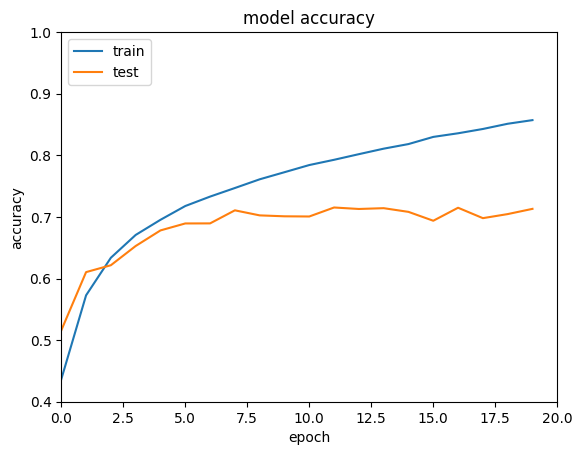

In [ ]:
LOSS = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
NUM_EPOCHS = 20 #You can change this value if you like to experiment with it to get better accuracy
OPTIMIZER = 'adam'

# Compile the model
model.compile(optimizer=OPTIMIZER,
              loss=LOSS,
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_images, train_labels, epochs=NUM_EPOCHS,
                    validation_data=(test_images, test_labels))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()

Modificando o modelo um pouco para tentar melhorar os resultados.
Aumento do numero de neuronios tanto na camada de convolucao quanto na camada dense. Implementacao de funcao callback e earlystop. Camada de saida ainda sem a aplicacao de softmax. Dropout adicionate entre as duas ultimas camadas

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 15, 15, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 358,218 (1.37 MB)

 Trainable params: 357,514 (1.36 MB)

 Non-trainable params: 704 (2.75 KB)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.4366 - loss: 1.6755 - val_accuracy: 0.5793 - val_loss: 1.1898
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.6502 - loss: 0.9988 - val_accuracy: 0.6179 - val_loss: 1.0889
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7133 - loss: 0.8287 - val_accuracy: 0.6767 - val_loss: 0.9449
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7563 - loss: 0.7050 - val_accuracy: 0.7327 - val_loss: 0.7837
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7907 - loss: 0.6045 - val_accuracy: 0.6885 - val_loss: 0.9558
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8173 - loss: 0.5335 - val_accuracy: 0.6947 - val_loss: 0.9369
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8397 - loss: 0.4715 - val_accuracy: 0.6991 - val_loss: 0.9254
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8512 - loss: 0.422

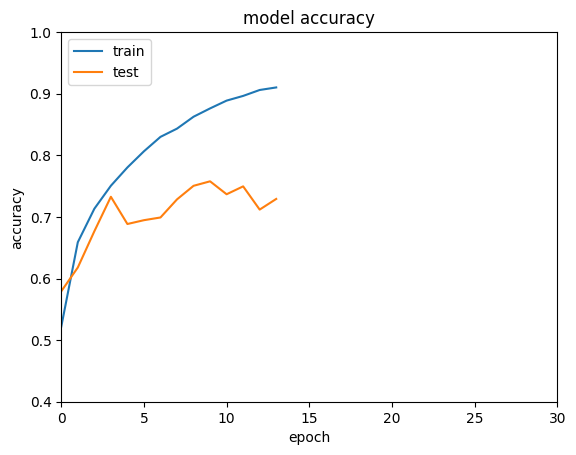

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

LOSS = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
NUM_EPOCHS = 30 #You can change this value if you like to experiment with it to get better accuracy
OPTIMIZER = 'adam'

FIRST_LAYER2 = layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))
HIDDEN_LAYER_TYPE_12 = layers.MaxPooling2D((2, 2))
HIDDEN_LAYER_TYPE_22 = layers.Conv2D(64, (3, 3), activation='relu')
HIDDEN_LAYER_TYPE_32 = layers.MaxPooling2D((2, 2))
HIDDEN_LAYER_TYPE_42 = layers.Conv2D(128, (3, 3), activation='relu')
HIDDEN_LAYER_TYPE_52 = layers.Dense(128, activation='relu')
LAST_LAYER2 = layers.Dense(10)

model2 = models.Sequential([
       FIRST_LAYER2,
       HIDDEN_LAYER_TYPE_12,
       layers.BatchNormalization(),
       HIDDEN_LAYER_TYPE_22,
       HIDDEN_LAYER_TYPE_32,
       layers.BatchNormalization(),
       HIDDEN_LAYER_TYPE_42,
       layers.BatchNormalization(),
       layers.Flatten(),
       HIDDEN_LAYER_TYPE_52,
       layers.BatchNormalization(),
       tf.keras.layers.Dropout(0.3),
       LAST_LAYER2,
])


model2.compile(optimizer=OPTIMIZER,
              loss=LOSS,
              metrics=['accuracy'])

model2.summary()


early_stop = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)


history2 = model2.fit(train_images, train_labels, epochs=NUM_EPOCHS,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stop])

# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()